In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib.ticker import MaxNLocator


sns.set(rc={'figure.figsize':(11, 4)})
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8) # não sei o motivo, mas o use acima reseta o size.

In [2]:
def drop_indef(dataframe, coluna):
    return dataframe[dataframe[coluna] != 'indef']

def convert_to_datetime(dataframe, coluna_data):
    return pd.to_datetime(dataframe[coluna_data])

def get_recent_reviews(dataframe, coluna_data='data_avaliacao', ano=2014):
    df_without_indef = drop_indef(dataframe, coluna_data)
    df_without_indef[coluna_data] = convert_to_datetime(df_without_indef, coluna_data)
    return df_without_indef[df_without_indef[coluna_data].dt.year > ano]

def normalize(df):
    return (df-df.mean())/df.std()

In [3]:
op_hotel = pd.read_csv('Ouro Preto/hoteis.csv').drop_duplicates('hotel_id')
print(f'{op_hotel.shape[0]} hoteis em Ouro Preto')
op_rest = pd.read_csv('Ouro Preto/restaurantes.csv').drop_duplicates()
print(f'{op_rest.shape[0]} restaurantes em Ouro Preto')
op_atr = pd.read_csv('Ouro Preto/atracoes.csv').drop_duplicates()
print(f'{op_atr.shape[0]} atrações em Ouro Preto')
op_aval_hotel = pd.read_csv('Ouro Preto/avaliacoes-hoteis.csv').drop_duplicates()
op_aval_rest = pd.read_csv('Ouro Preto/avaliacoes-restaurantes.csv')
op_aval_rest = op_aval_rest.drop_duplicates(op_aval_rest.columns[:-2])
op_aval_atr = pd.read_csv('Ouro Preto/avaliacoes-atracoes.csv').drop_duplicates()

mar_hotel = pd.read_csv('Mariana/hoteis.csv').drop_duplicates('hotel_id')
print(f'{mar_hotel.shape[0]} hoteis em Mariana')
mar_rest = pd.read_csv('Mariana/restaurantes.csv').drop_duplicates()
print(f'{mar_rest.shape[0]} restaurantes em Mariana')
mar_atr = pd.read_csv('Mariana/atracoes.csv').drop_duplicates()
print(f'{mar_atr.shape[0]} atrações em Mariana')
mar_aval_hotel = pd.read_csv('Mariana/avaliacoes-hoteis.csv').drop_duplicates()
mar_aval_rest = pd.read_csv('Mariana/avaliacoes-restaurantes.csv')
mar_aval_rest = mar_aval_rest.drop_duplicates(mar_aval_rest.columns[:-2])
mar_aval_atr = pd.read_csv('Mariana/avaliacoes-atracoes.csv').drop_duplicates()

165 hoteis em Ouro Preto
307 restaurantes em Ouro Preto
121 atrações em Ouro Preto
39 hoteis em Mariana
158 restaurantes em Mariana
30 atrações em Mariana


In [4]:
hoteis = pd.concat([op_hotel, mar_hotel], ignore_index=True)
restaurantes = pd.concat([op_rest, mar_rest], ignore_index=True)
atracoes = pd.concat([op_atr, mar_atr], ignore_index=True)
print(str(hoteis.shape[0]) + ' hoteis')
print(str(restaurantes.shape[0]) + ' restaurantes')
print(str(atracoes.shape[0]) + ' atracoes')

204 hoteis
465 restaurantes
151 atracoes


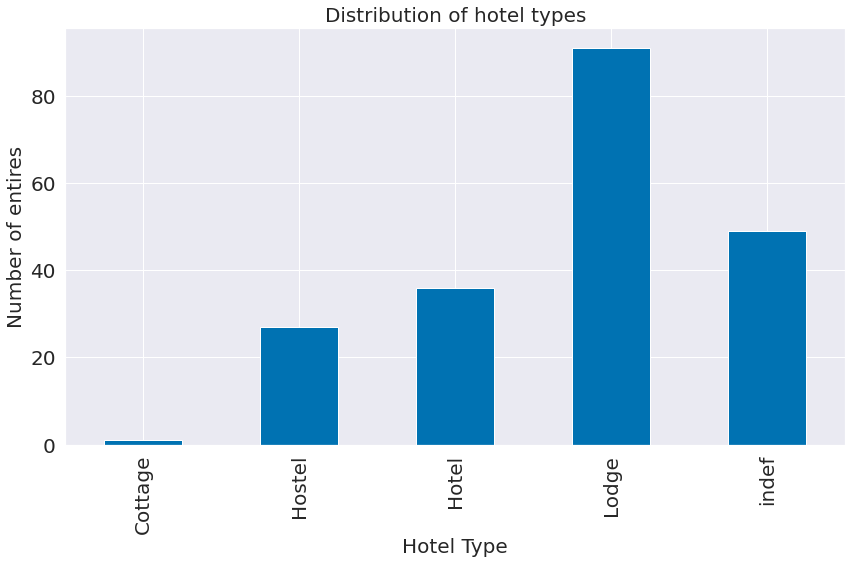

In [5]:
tipos_hoteis = hoteis.groupby('tipo')['nome'].count().rename({'Chale': 'Cottage', 'Hostel': 'Hostel', 'Hotel':'Hotel', 'Pousada': 'Lodge', 'indef':'indef'})
tipos_hoteis.plot.bar()
plt.xlabel('Hotel Type')
plt.ylabel('Number of entires')
plt.title('Distribution of hotel types')
plt.tight_layout()
plt.savefig('graficos/en-grafico1.png')

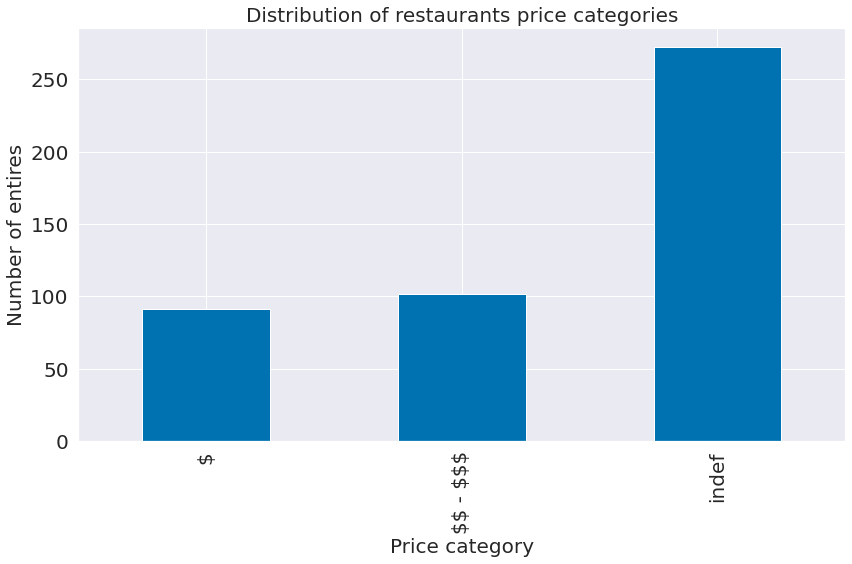

In [6]:
restaurantes.groupby('categoria_preco')['nome'].count().plot.bar()
plt.xlabel('Price category')
plt.ylabel('Number of entires')
plt.title('Distribution of restaurants price categories')
plt.tight_layout()
plt.savefig('graficos/en-grafico2.png')

In [7]:
avaliacoes_hoteis = pd.concat([op_aval_hotel, mar_aval_hotel], ignore_index=True)
avaliacoes_restaurantes = pd.concat([op_aval_rest, mar_aval_rest], ignore_index=True)
avaliacoes_atracoes = pd.concat([op_aval_atr, mar_aval_atr], ignore_index=True)
print(str(avaliacoes_hoteis.shape[0]) + ' avaliacoes de hoteis')
print(str(avaliacoes_restaurantes.shape[0]) + ' avaliacoes de restaurantes')
print(str(avaliacoes_atracoes.shape[0]) + ' avaliacoes de atracoes')

10223 avaliacoes de hoteis
22061 avaliacoes de restaurantes
26907 avaliacoes de atracoes


In [8]:
avaliacoes_hoteis_recentes = get_recent_reviews(avaliacoes_hoteis)

avaliacoes_restaurantes_recentes = get_recent_reviews(avaliacoes_restaurantes)

avaliacoes_atracoes_recentes = get_recent_reviews(avaliacoes_atracoes)

<ipython-input-2-83f0a9db26c5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_indef[coluna_data] = convert_to_datetime(df_without_indef, coluna_data)
<ipython-input-2-83f0a9db26c5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_indef[coluna_data] = convert_to_datetime(df_without_indef, coluna_data)


In [9]:
#gb = avaliacoes_hoteis_recentes.groupby(avaliacoes_hoteis_recentes['data_avaliacao'])['estabelecimento']                                
comentarios_por_mes_hoteis = avaliacoes_hoteis_recentes.set_index('data_avaliacao')['estabelecimento'].resample('M').count()
gb = avaliacoes_hoteis_recentes.groupby(avaliacoes_hoteis_recentes['data_avaliacao'].dt.year)['estabelecimento']
comentarios_por_ano_hoteis = gb.count()

#gb = avaliacoes_restaurantes_recentes.groupby([avaliacoes_restaurantes_recentes['data_avaliacao'].dt.year,
#                                            avaliacoes_restaurantes_recentes['data_avaliacao'].dt.month])['estabelecimento']                                
comentarios_por_mes_restaurantes = avaliacoes_restaurantes_recentes.set_index('data_avaliacao')['estabelecimento'].resample('M').count()
gb = avaliacoes_hoteis_recentes.groupby(avaliacoes_hoteis_recentes['data_avaliacao'].dt.year)['estabelecimento']
comentarios_por_ano_restaurantes = gb.count()

#gb = avaliacoes_atracoes_recentes.groupby(avaliacoes_atracoes_recentes['data_avaliacao'])['estabelecimento']
comentarios_por_mes_atracoes = avaliacoes_atracoes_recentes.set_index('data_avaliacao')['estabelecimento'].resample('M').count()
gb = avaliacoes_atracoes_recentes.groupby(avaliacoes_atracoes_recentes['data_avaliacao'].dt.year)['estabelecimento']
comentarios_por_ano_atracoes = gb.count()

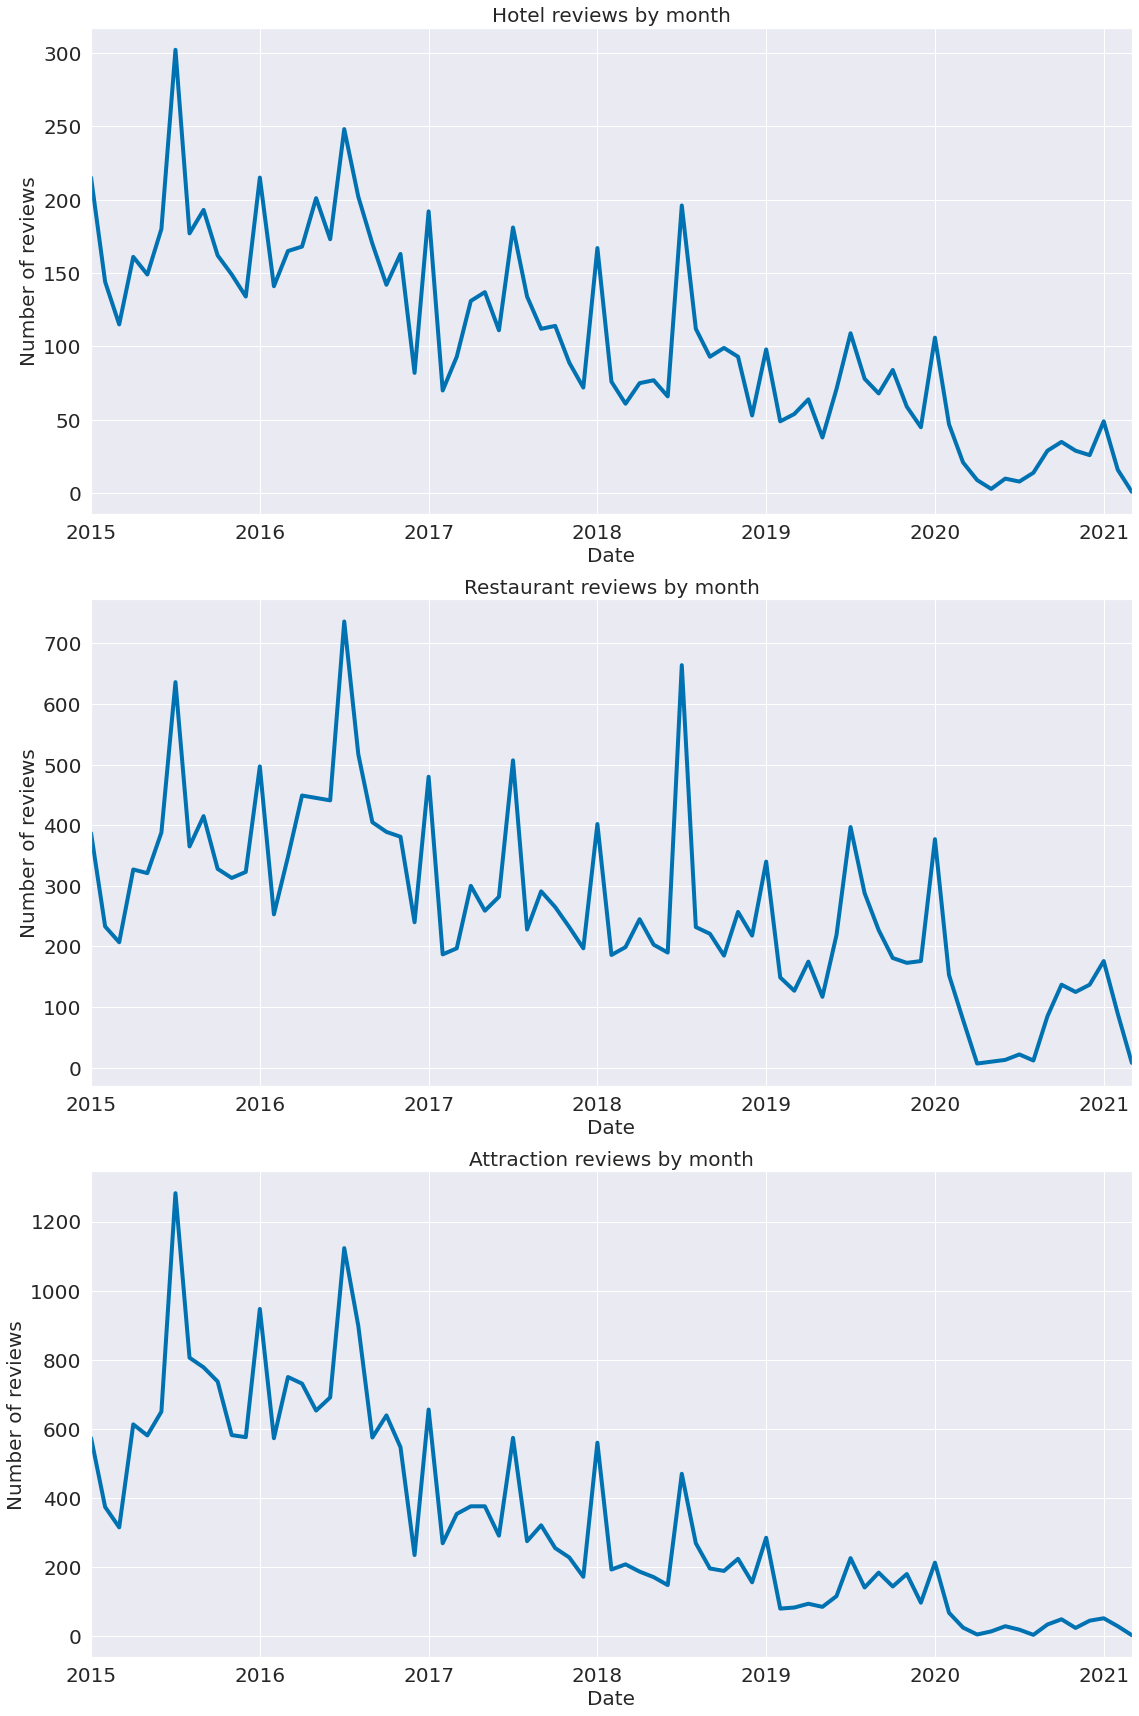

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(16, 24))

comentarios_por_mes_hoteis.plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title("Hotel reviews by month")
comentarios_por_mes_restaurantes.plot(ax=ax2)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title("Restaurant reviews by month")
comentarios_por_mes_atracoes.plot(ax=ax3)
ax3.set(xlabel='Date', ylabel='Number of reviews')
ax3.set_title("Attraction reviews by month")

plt.tight_layout()
plt.savefig('graficos/en-grafico3.png')

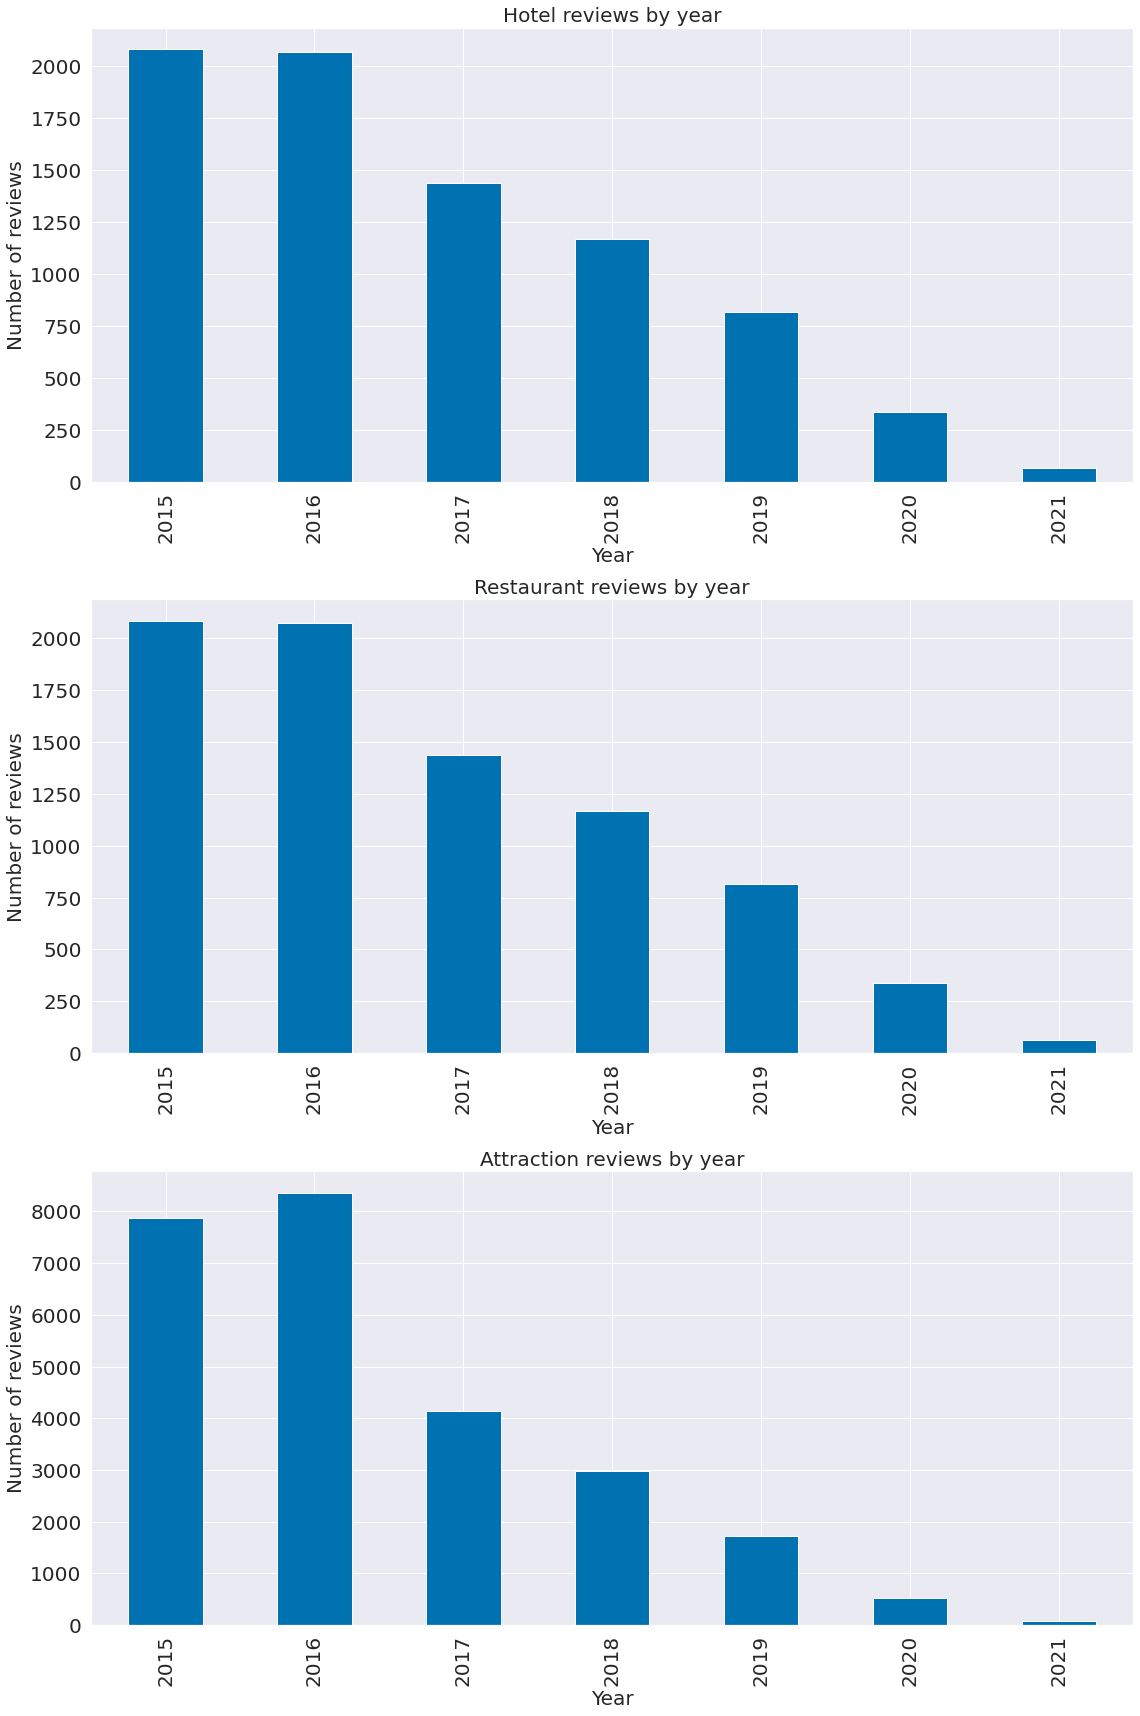

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(16, 24))

comentarios_por_ano_hoteis.plot(ax=ax1, kind='bar')
ax1.set(xlabel='Year', ylabel='Number of reviews')
ax1.set_title("Hotel reviews by year")
comentarios_por_ano_restaurantes.plot(ax=ax2, kind='bar')
ax2.set(xlabel='Year', ylabel='Number of reviews')
ax2.set_title("Restaurant reviews by year")
comentarios_por_ano_atracoes.plot(ax=ax3, kind='bar')
ax3.set(xlabel='Year', ylabel='Number of reviews')
ax3.set_title("Attraction reviews by year")

plt.tight_layout()
plt.savefig('graficos/en-grafico4.png')

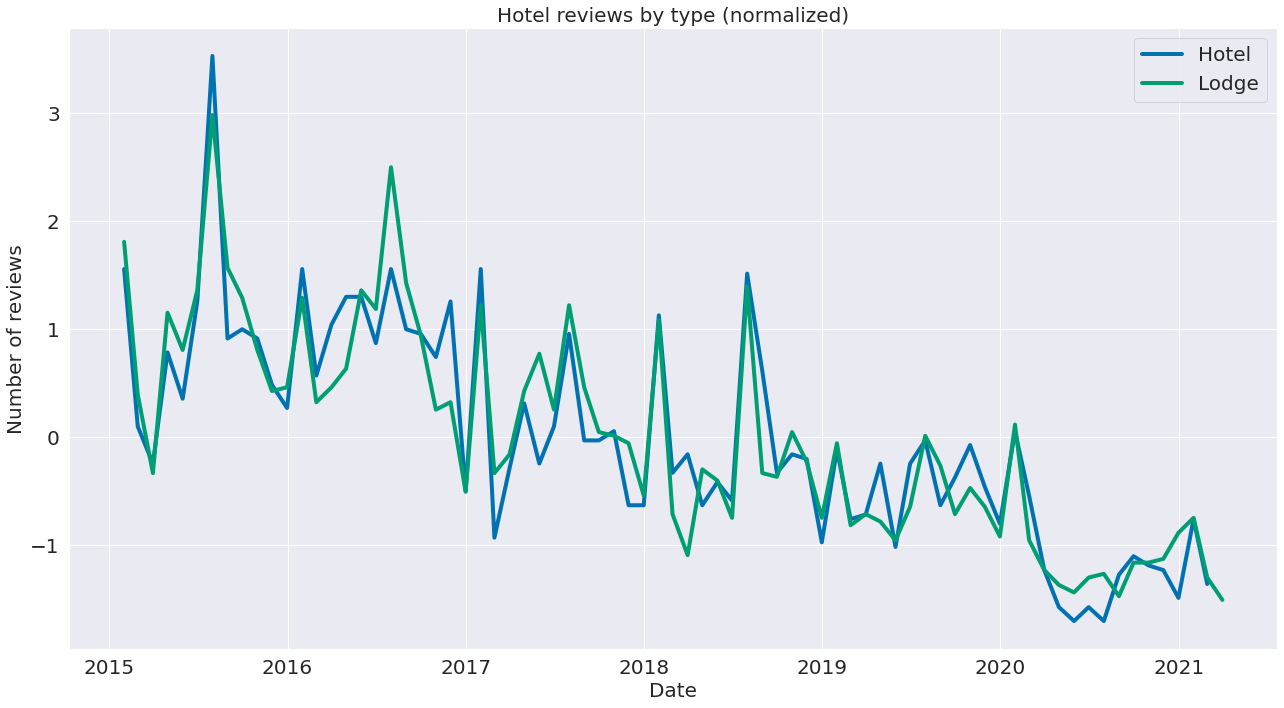

In [12]:
merged_df = pd.merge(hoteis, avaliacoes_hoteis_recentes, how='right', left_on='hotel_id', right_on='estabelecimento_id')

avaliacoes_tipo_hotel = merged_df[merged_df['tipo'] == 'Hotel']
avaliacoes_tipo_pousada = merged_df[merged_df['tipo'] == 'Pousada']

plt.figure(figsize=(18,10))
plt.plot(normalize(avaliacoes_tipo_hotel.set_index('data_avaliacao')['estabelecimento'].resample('M').count()))
plt.plot(normalize(avaliacoes_tipo_pousada.set_index('data_avaliacao')['estabelecimento'].resample('M').count()))

plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.title('Hotel reviews by type (normalized)')
plt.legend(['Hotel', 'Lodge'])
plt.tight_layout()
plt.savefig('graficos/en-grafico5.png')

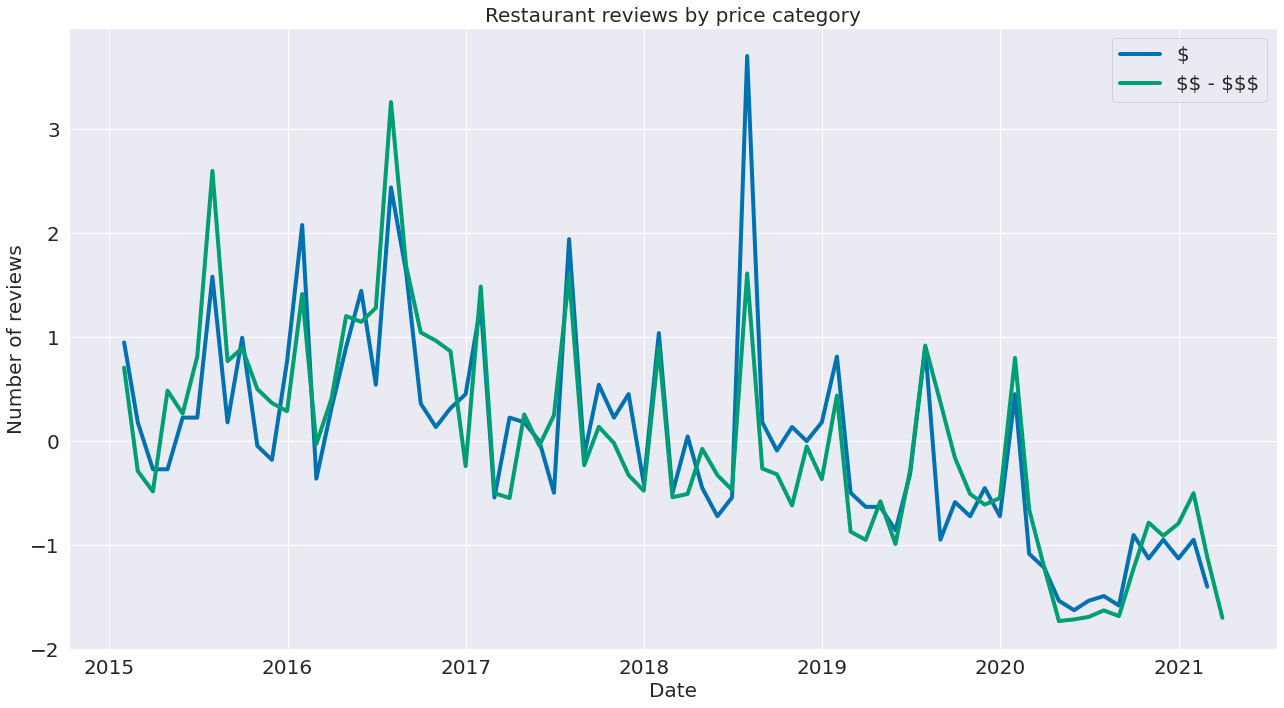

In [13]:
merged_df = pd.merge(restaurantes, avaliacoes_restaurantes_recentes, how='right', left_on='restaurante_id', right_on='estabelecimento_id')

avaliacoes_rest_barato = merged_df[merged_df['categoria_preco'] == '$']
avaliacoes_rest_med = merged_df[merged_df['categoria_preco'] == '$$ - $$$']

plt.figure(figsize=(18,10))
plt.plot(normalize(avaliacoes_rest_barato.set_index('data_avaliacao')['estabelecimento'].resample('M').count()))
plt.plot(normalize(avaliacoes_rest_med.set_index('data_avaliacao')['estabelecimento'].resample('M').count()))

plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.title('Restaurant reviews by price category')
plt.legend(['$', '$$ - $$$'])
plt.tight_layout()
plt.savefig('graficos/en-grafico6.png')

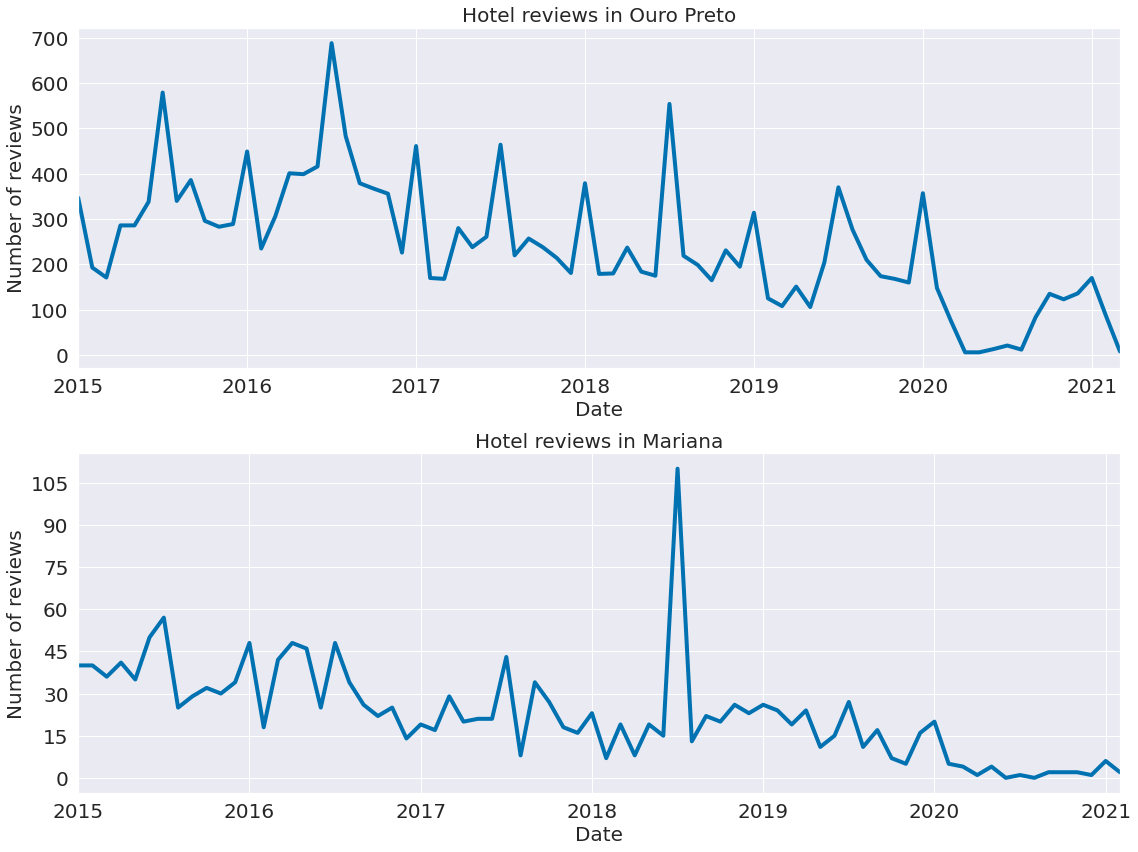

In [14]:
avaliacoes_hoteis_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_hoteis_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
#avaliacoes_hoteis_ouro_preto.groupby('data_avaliacao')['estabelecimento'].count().plot(ax=ax1)
avaliacoes_hoteis_ouro_preto.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Hotel reviews in Ouro Preto')
avaliacoes_hoteis_mariana.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax2)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Hotel reviews in Mariana')
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.savefig('graficos/en-grafico7.png')

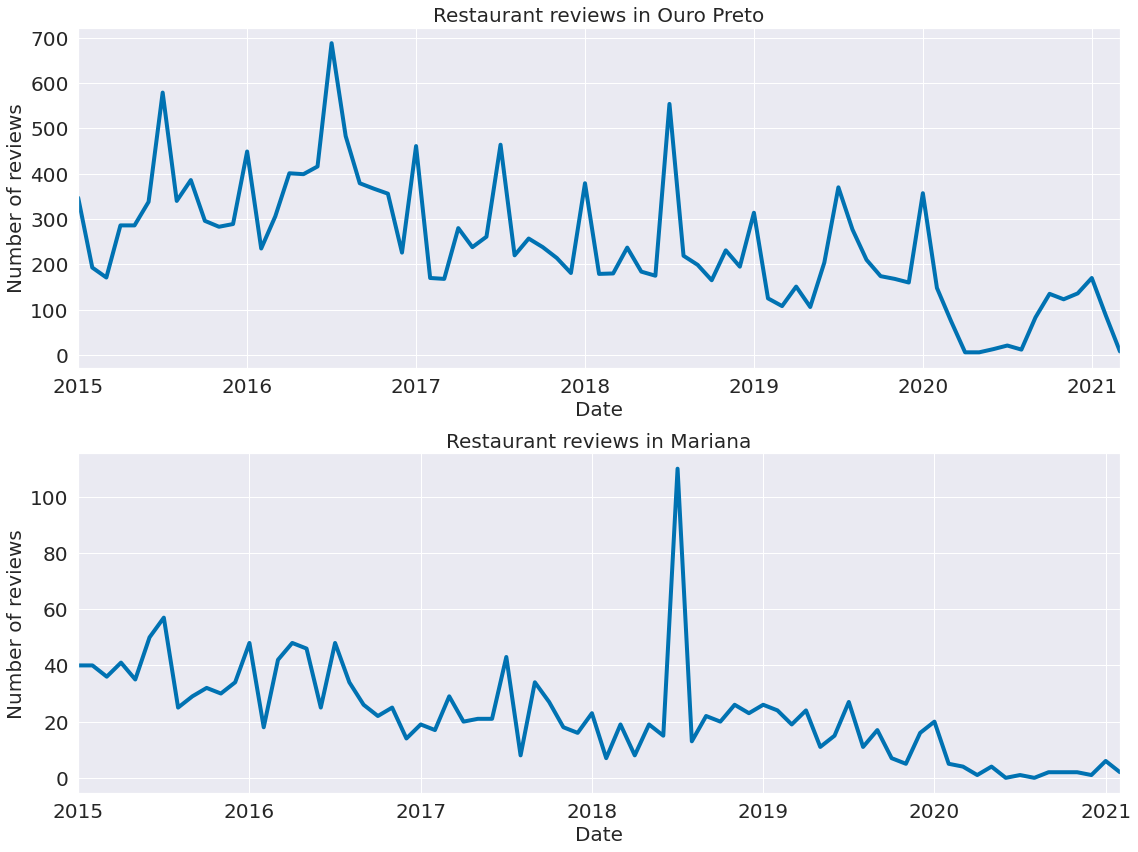

In [15]:
merged_df = pd.merge(restaurantes, avaliacoes_restaurantes_recentes, left_on='restaurante_id', right_on='estabelecimento_id')
avaliacoes_restaurantes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_restaurantes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_restaurantes_ouro_preto.set_index('data_avaliacao').resample('M')['estabelecimento'].count().plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Restaurant reviews in Ouro Preto')
avaliacoes_restaurantes_mariana.set_index('data_avaliacao').resample('M')['estabelecimento'].count().plot(ax=ax2)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Restaurant reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico8.png')

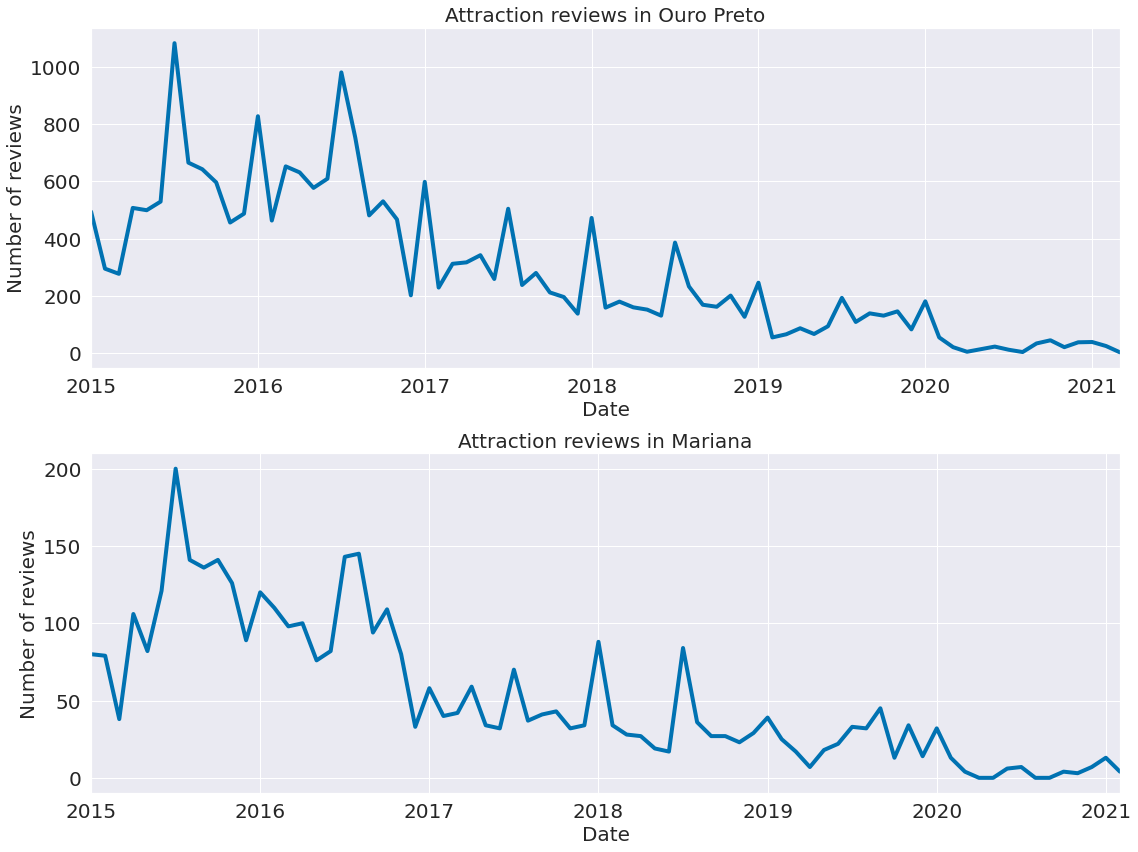

In [16]:
merged_df = pd.merge(atracoes, avaliacoes_atracoes_recentes, how='inner', left_on='atracao_id', right_on='estabelecimento_id')
avaliacoes_atracoes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_atracoes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_atracoes_ouro_preto.set_index('data_avaliacao').resample('M')['estabelecimento'].count().plot(ax=ax1)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Attraction reviews in Ouro Preto')
avaliacoes_atracoes_mariana.set_index('data_avaliacao').resample('M')['estabelecimento'].count().plot(ax=ax2)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Attraction reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico9.png')

<ipython-input-2-83f0a9db26c5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_indef[coluna_data] = convert_to_datetime(df_without_indef, coluna_data)


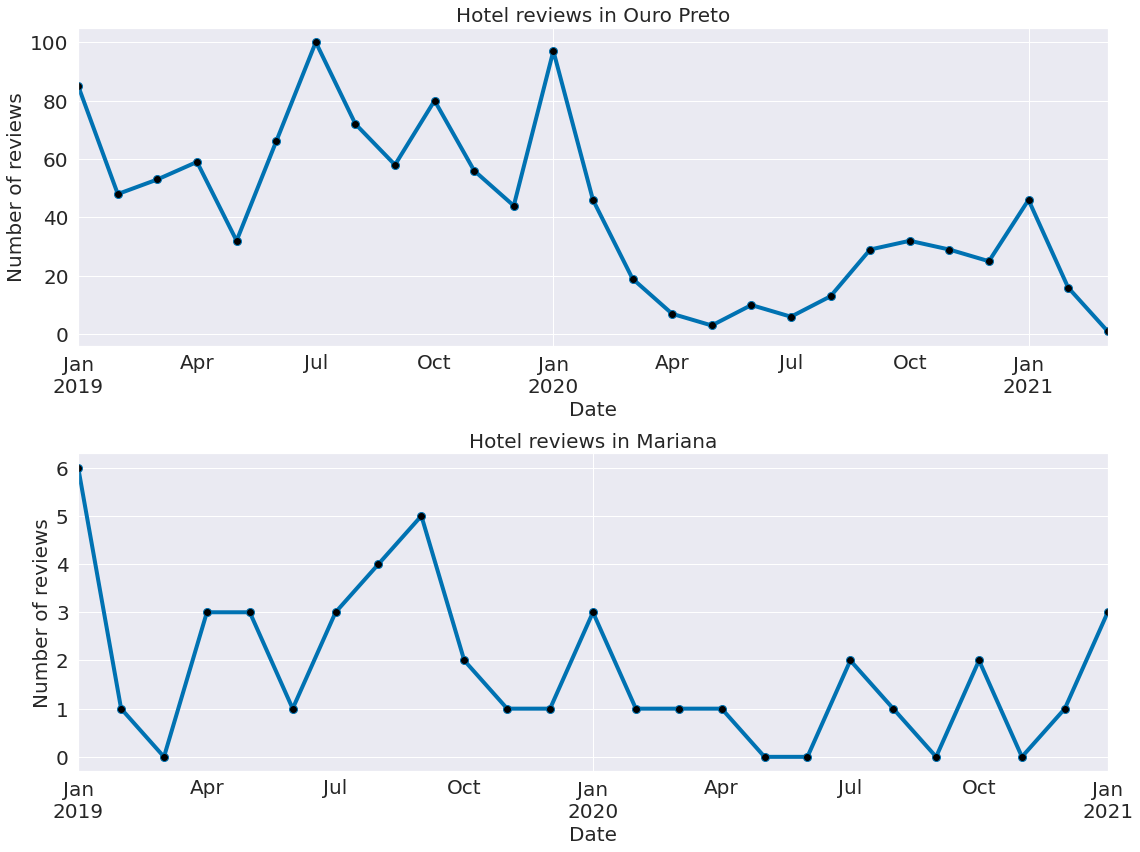

In [17]:
avaliacoes_hoteis_pandemia = get_recent_reviews(avaliacoes_hoteis, ano=2018)
merged_df = pd.merge(hoteis, avaliacoes_hoteis_pandemia, how='inner', left_on='hotel_id', right_on='estabelecimento_id')
avaliacoes_hoteis_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_hoteis_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_hoteis_ouro_preto.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Hotel reviews in Ouro Preto')
avaliacoes_hoteis_mariana.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Hotel reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico10.png')

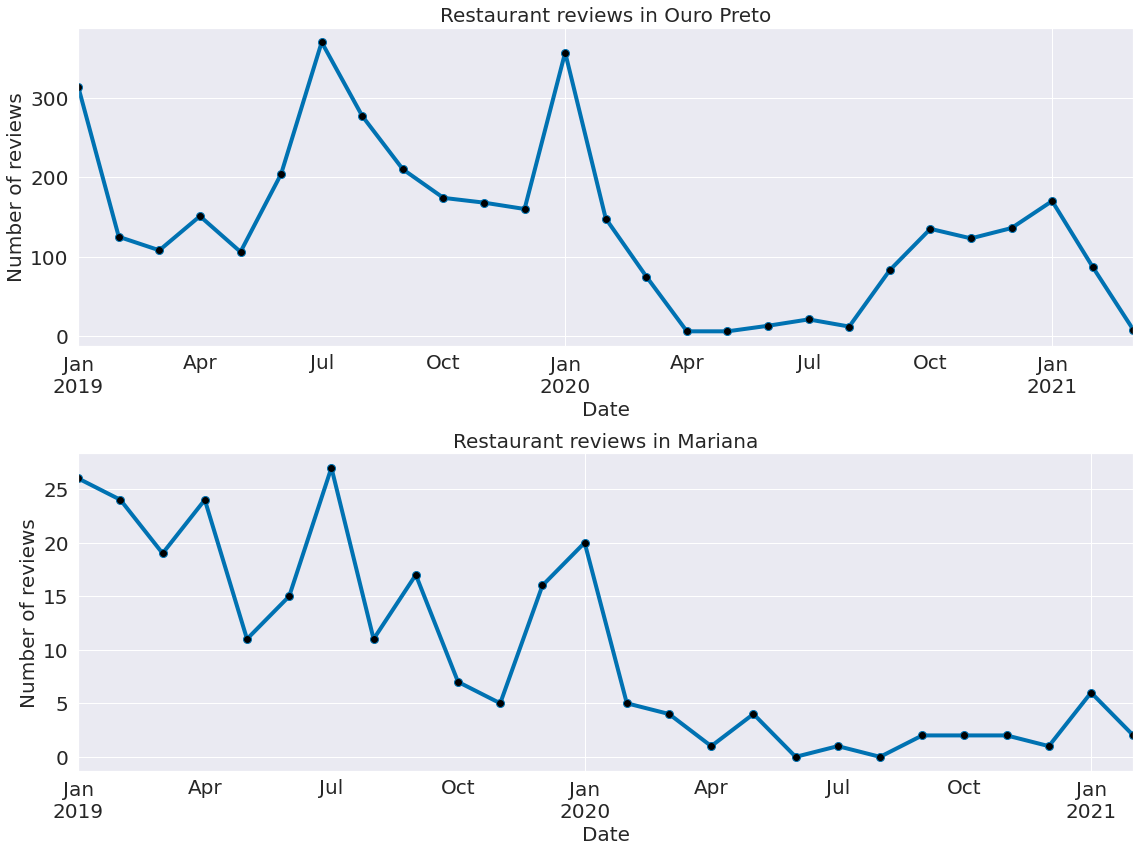

In [18]:
avaliacoes_restaurantes_pandemia = get_recent_reviews(avaliacoes_restaurantes, ano=2018)
merged_df = pd.merge(restaurantes, avaliacoes_restaurantes_pandemia, how='inner', left_on='restaurante_id', right_on='estabelecimento_id')
avaliacoes_restaurantes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_restaurantes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_restaurantes_ouro_preto.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Restaurant reviews in Ouro Preto')
avaliacoes_restaurantes_mariana.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Restaurant reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico11.png')

<ipython-input-2-83f0a9db26c5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_indef[coluna_data] = convert_to_datetime(df_without_indef, coluna_data)


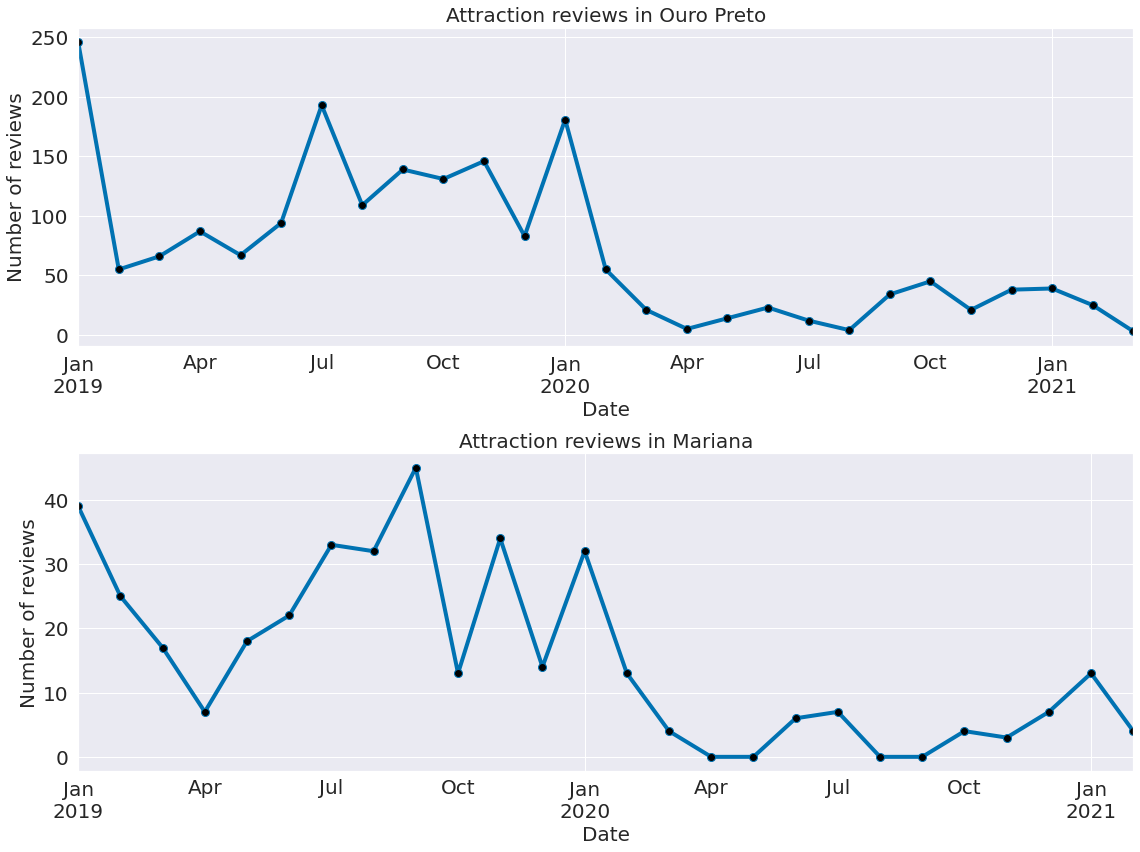

In [19]:
avaliacoes_atracoes_pandemia = get_recent_reviews(avaliacoes_atracoes, ano=2018)
merged_df = pd.merge(atracoes, avaliacoes_atracoes_pandemia, how='inner', left_on='atracao_id', right_on='estabelecimento_id')
avaliacoes_atracoes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_atracoes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_atracoes_ouro_preto.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Attraction reviews in Ouro Preto')
avaliacoes_atracoes_mariana.set_index('data_avaliacao')['estabelecimento'].resample('M').count().plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Attraction reviews in Mariana')
plt.tight_layout()
plt.savefig('graficos/en-grafico12.png')

In [20]:
avaliacoes_hoteis_pandemia['tam_chars'] = avaliacoes_hoteis_pandemia.apply(lambda row: len(row['conteudo']), axis=1)
avaliacoes_hoteis_pandemia['tam_palavras'] = avaliacoes_hoteis_pandemia.apply(lambda row: len(row['conteudo'].split()), axis=1)

avaliacoes_restaurantes_pandemia['tam_chars'] = avaliacoes_restaurantes_pandemia.apply(lambda row: len(row['conteudo']), axis=1)
avaliacoes_restaurantes_pandemia['tam_palavras'] = avaliacoes_restaurantes_pandemia.apply(lambda row: len(row['conteudo'].split()), axis=1)

avaliacoes_atracoes_pandemia['tam_chars'] = avaliacoes_atracoes_pandemia.apply(lambda row: len(row['conteudo']), axis=1)
avaliacoes_atracoes_pandemia['tam_palavras'] = avaliacoes_atracoes_pandemia.apply(lambda row: len(row['conteudo'].split()), axis=1)

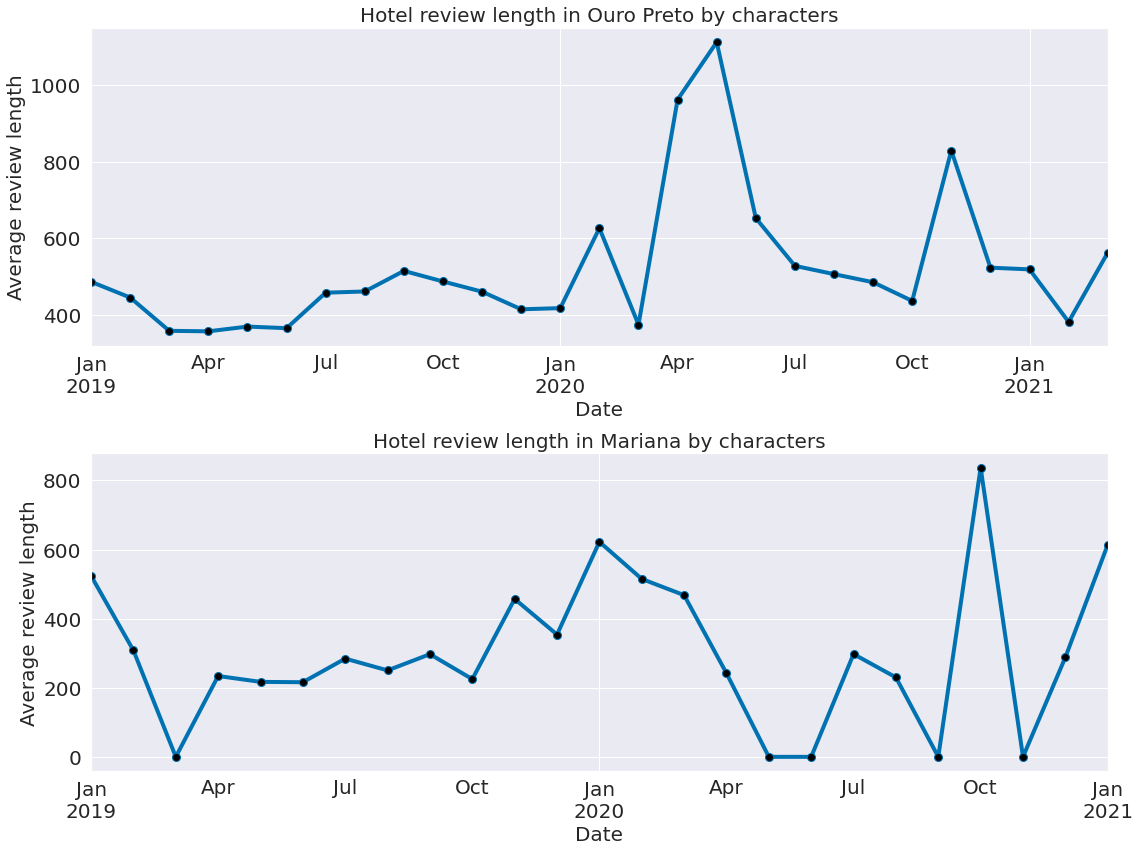

In [21]:
merged_df = pd.merge(hoteis, avaliacoes_hoteis_pandemia, how='inner', left_on='hotel_id', right_on='estabelecimento_id')
avaliacoes_hoteis_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_hoteiss_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_hoteis_ouro_preto.set_index('data_avaliacao')['tam_chars'].resample('M').mean().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Average review length')
ax1.set_title('Hotel review length in Ouro Preto by characters')
avaliacoes_hoteiss_mariana.set_index('data_avaliacao')['tam_chars'].resample('M').mean().fillna(0).plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Average review length')
ax2.set_title('Hotel review length in Mariana by characters')
plt.tight_layout()
plt.savefig('graficos/en-grafico13.png')

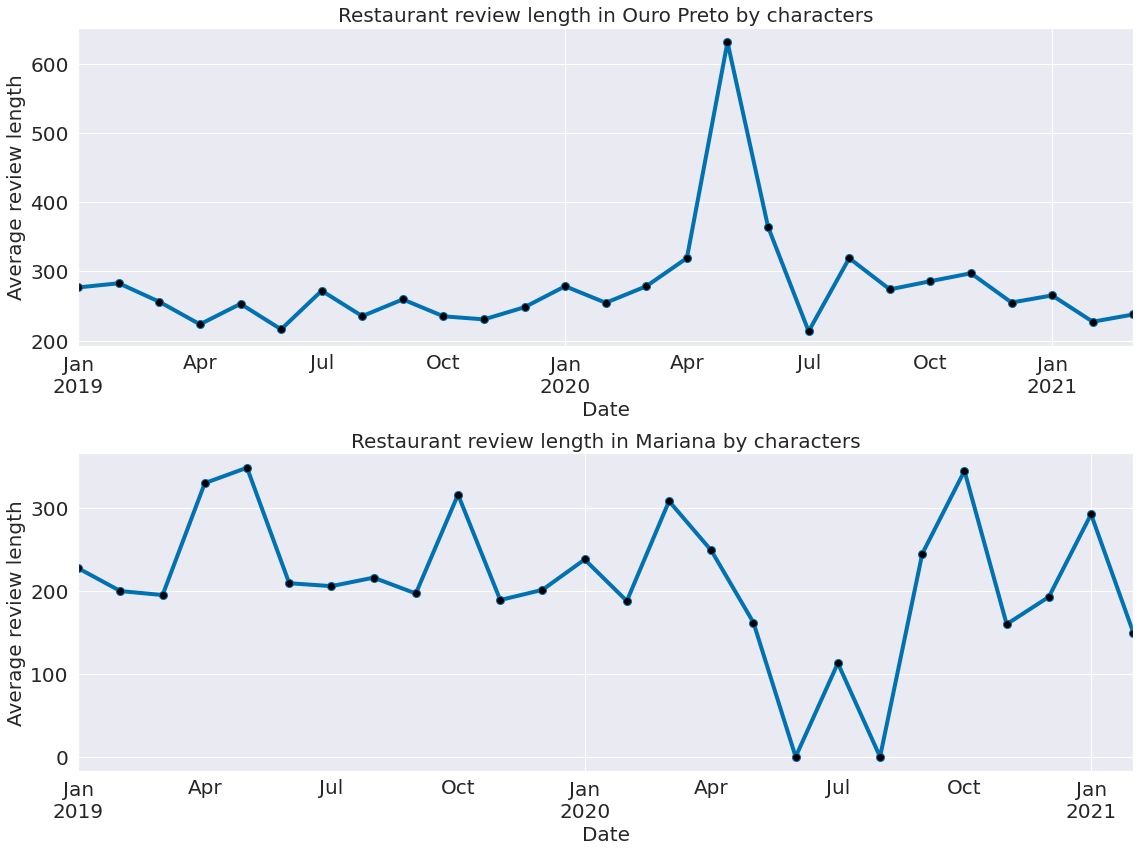

In [22]:
merged_df = pd.merge(restaurantes, avaliacoes_restaurantes_pandemia, how='inner', left_on='restaurante_id', right_on='estabelecimento_id')
avaliacoes_restaurantes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_restaurantes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_restaurantes_ouro_preto.set_index('data_avaliacao')['tam_chars'].resample('M').mean().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Average review length')
ax1.set_title('Restaurant review length in Ouro Preto by characters')
avaliacoes_restaurantes_mariana.set_index('data_avaliacao')['tam_chars'].resample('M').mean().fillna(0).plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Average review length')
ax2.set_title('Restaurant review length in Mariana by characters')
plt.tight_layout()
plt.savefig('graficos/en-grafico14.png')

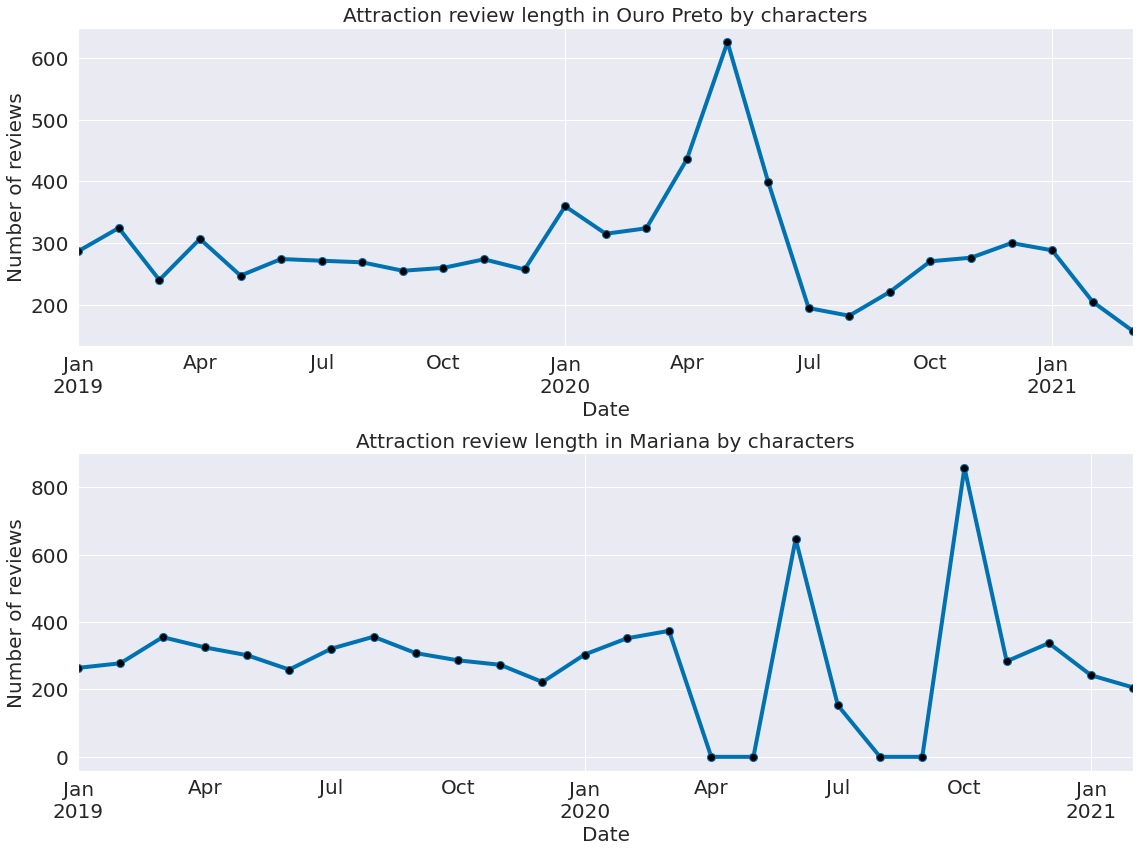

In [23]:
merged_df = pd.merge(atracoes, avaliacoes_atracoes_pandemia, how='inner', left_on='atracao_id', right_on='estabelecimento_id')
avaliacoes_atracoes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_atracoes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_atracoes_ouro_preto.set_index('data_avaliacao')['tam_chars'].resample('M').mean().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Attraction review length in Ouro Preto by characters')
avaliacoes_atracoes_mariana.set_index('data_avaliacao')['tam_chars'].resample('M').mean().fillna(0).plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Attraction review length in Mariana by characters')
plt.tight_layout()
plt.savefig('graficos/en-grafico15.png')

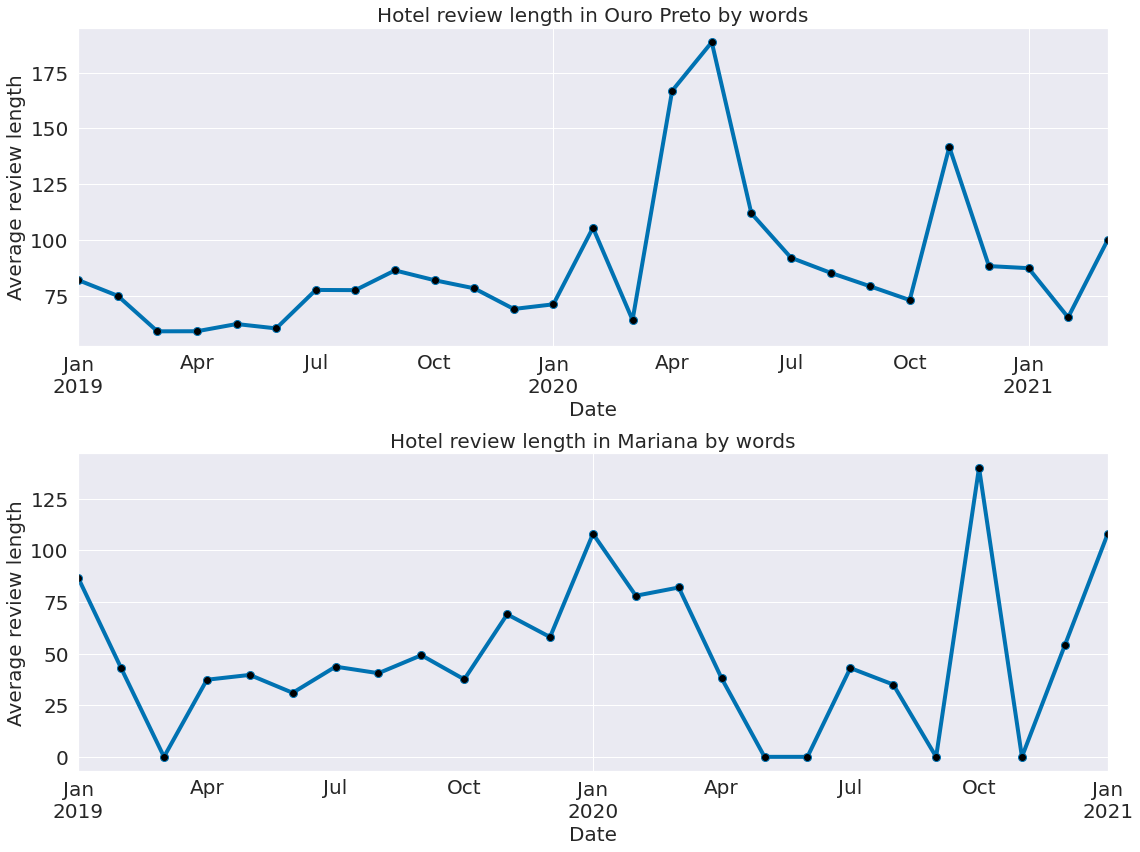

In [24]:
merged_df = pd.merge(hoteis, avaliacoes_hoteis_pandemia, how='inner', left_on='hotel_id', right_on='estabelecimento_id')
avaliacoes_hoteis_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_hoteiss_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_hoteis_ouro_preto.set_index('data_avaliacao')['tam_palavras'].resample('M').mean().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Average review length')
ax1.set_title('Hotel review length in Ouro Preto by words')
avaliacoes_hoteiss_mariana.set_index('data_avaliacao')['tam_palavras'].resample('M').mean().fillna(0).plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Average review length')
ax2.set_title('Hotel review length in Mariana by words')
plt.tight_layout()
plt.savefig('graficos/en-grafico16.png')

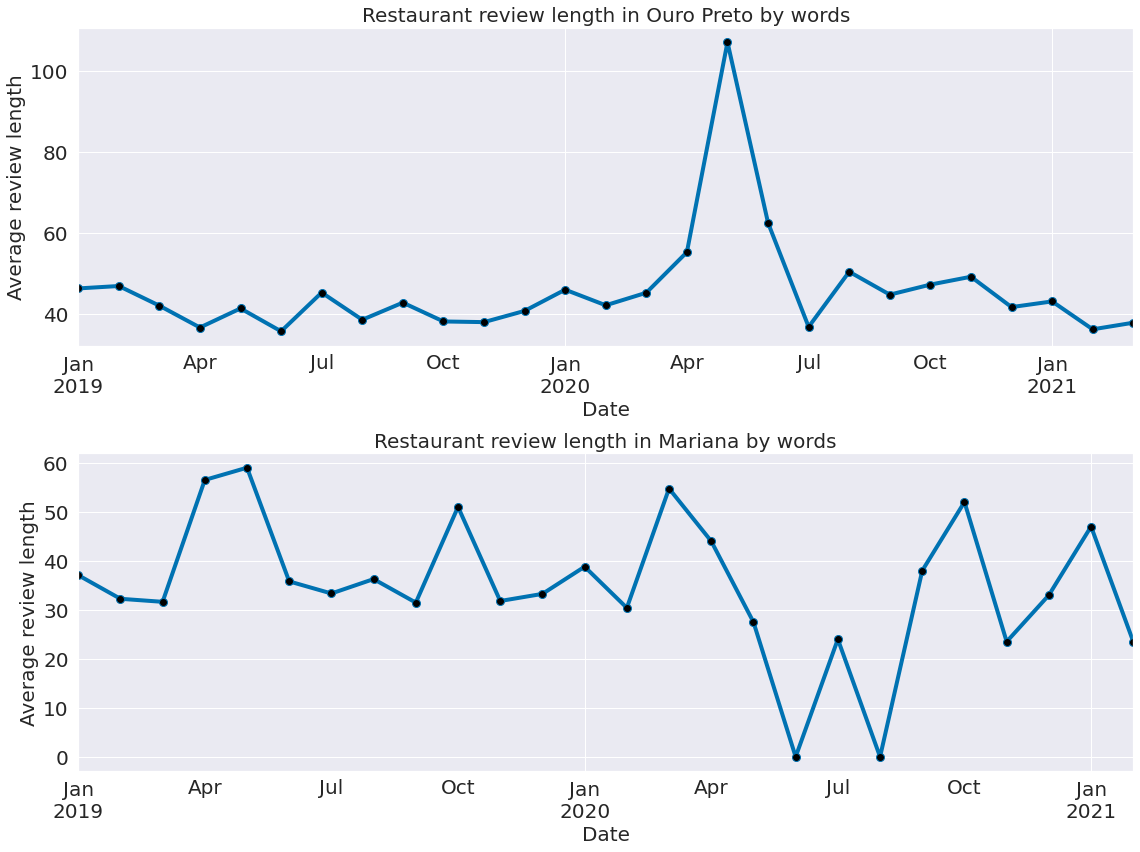

In [25]:
merged_df = pd.merge(restaurantes, avaliacoes_restaurantes_pandemia, how='inner', left_on='restaurante_id', right_on='estabelecimento_id')
avaliacoes_restaurantes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_restaurantes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_restaurantes_ouro_preto.set_index('data_avaliacao')['tam_palavras'].resample('M').mean().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Average review length')
ax1.set_title('Restaurant review length in Ouro Preto by words')
avaliacoes_restaurantes_mariana.set_index('data_avaliacao')['tam_palavras'].resample('M').mean().fillna(0).plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Average review length')
ax2.set_title('Restaurant review length in Mariana by words')
plt.tight_layout()
plt.savefig('graficos/en-grafico17.png')

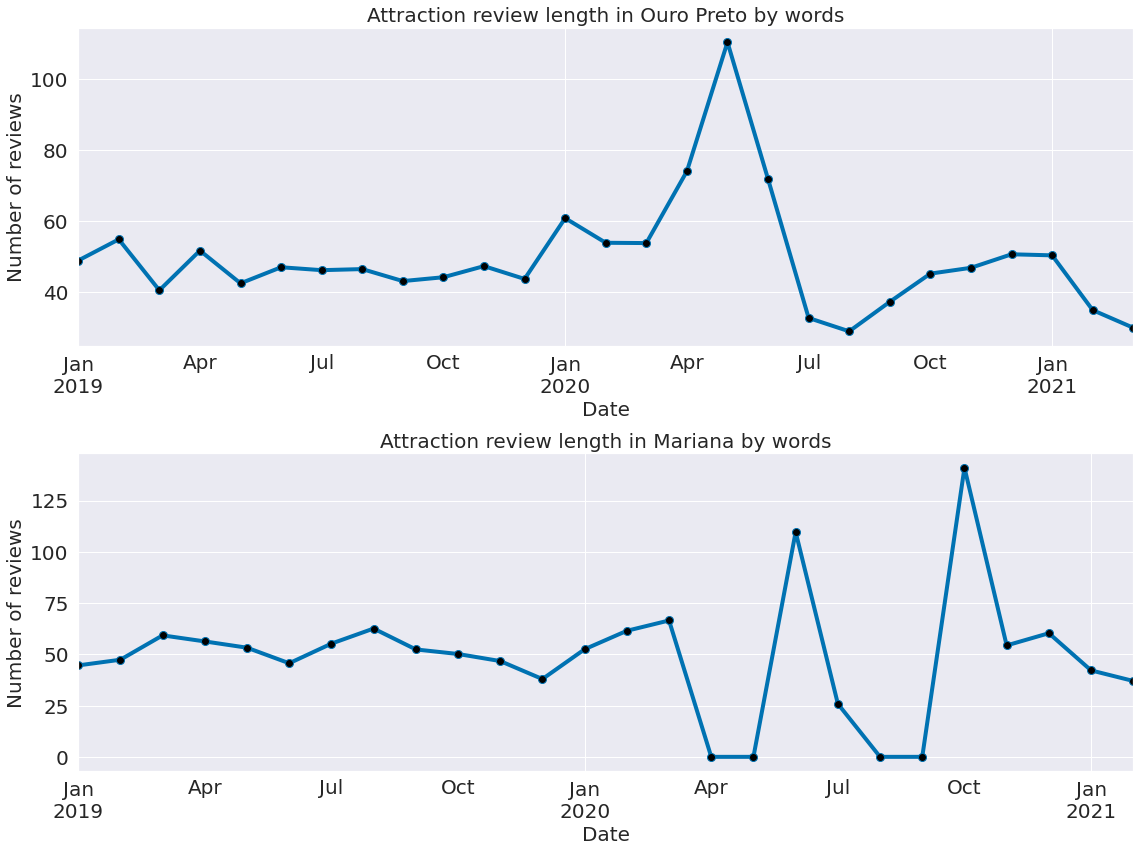

In [26]:
merged_df = pd.merge(atracoes, avaliacoes_atracoes_pandemia, how='inner', left_on='atracao_id', right_on='estabelecimento_id')
avaliacoes_atracoes_ouro_preto = merged_df[merged_df['cidade'] == 'Ouro Preto ']
avaliacoes_atracoes_mariana = merged_df[merged_df['cidade'] == 'Mariana ']

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 12))
avaliacoes_atracoes_ouro_preto.set_index('data_avaliacao')['tam_palavras'].resample('M').mean().plot(ax=ax1, style='-', marker='o', markerfacecolor='black', markersize=8)
ax1.set(xlabel='Date', ylabel='Number of reviews')
ax1.set_title('Attraction review length in Ouro Preto by words')
avaliacoes_atracoes_mariana.set_index('data_avaliacao')['tam_palavras'].resample('M').mean().fillna(0).plot(ax=ax2, style='-', marker='o', markerfacecolor='black', markersize=8)
ax2.set(xlabel='Date', ylabel='Number of reviews')
ax2.set_title('Attraction review length in Mariana by words')
plt.tight_layout()
plt.savefig('graficos/en-grafico18.png')